# Author : Shobhit
## Date : 20-6-2021

Trusted
Jupyter Server: local
Python 3.8.3 64-bit: Idle

PROBLEM STATEMENT
The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sex: Sex
Age: Age in years
Sibsp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Target class: Survived: Survival (0 = No, 1 = Yes)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [2]:
train_data = pd.read_csv("Dataset/Train_Titanic.csv")

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
len(train_data)

891

Creating Dataframe

# Visualizing data

Number of survived passengers in training set

In [7]:
len(train_data[train_data['Survived'] == 1])

342

Plotting different class of passenger's count and their survivability

<AxesSubplot:xlabel='Pclass', ylabel='count'>

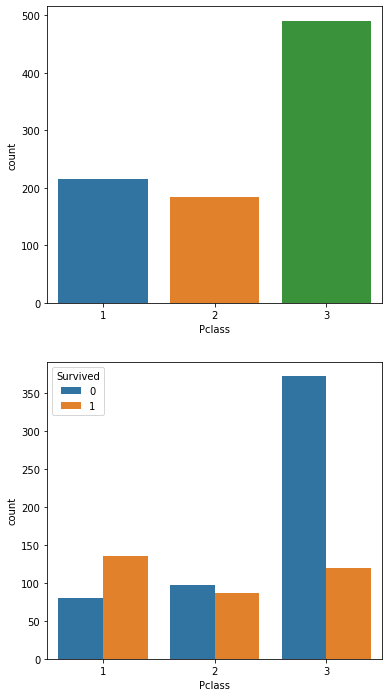

In [8]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = train_data)
plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data)

<AxesSubplot:xlabel='Fare', ylabel='count'>

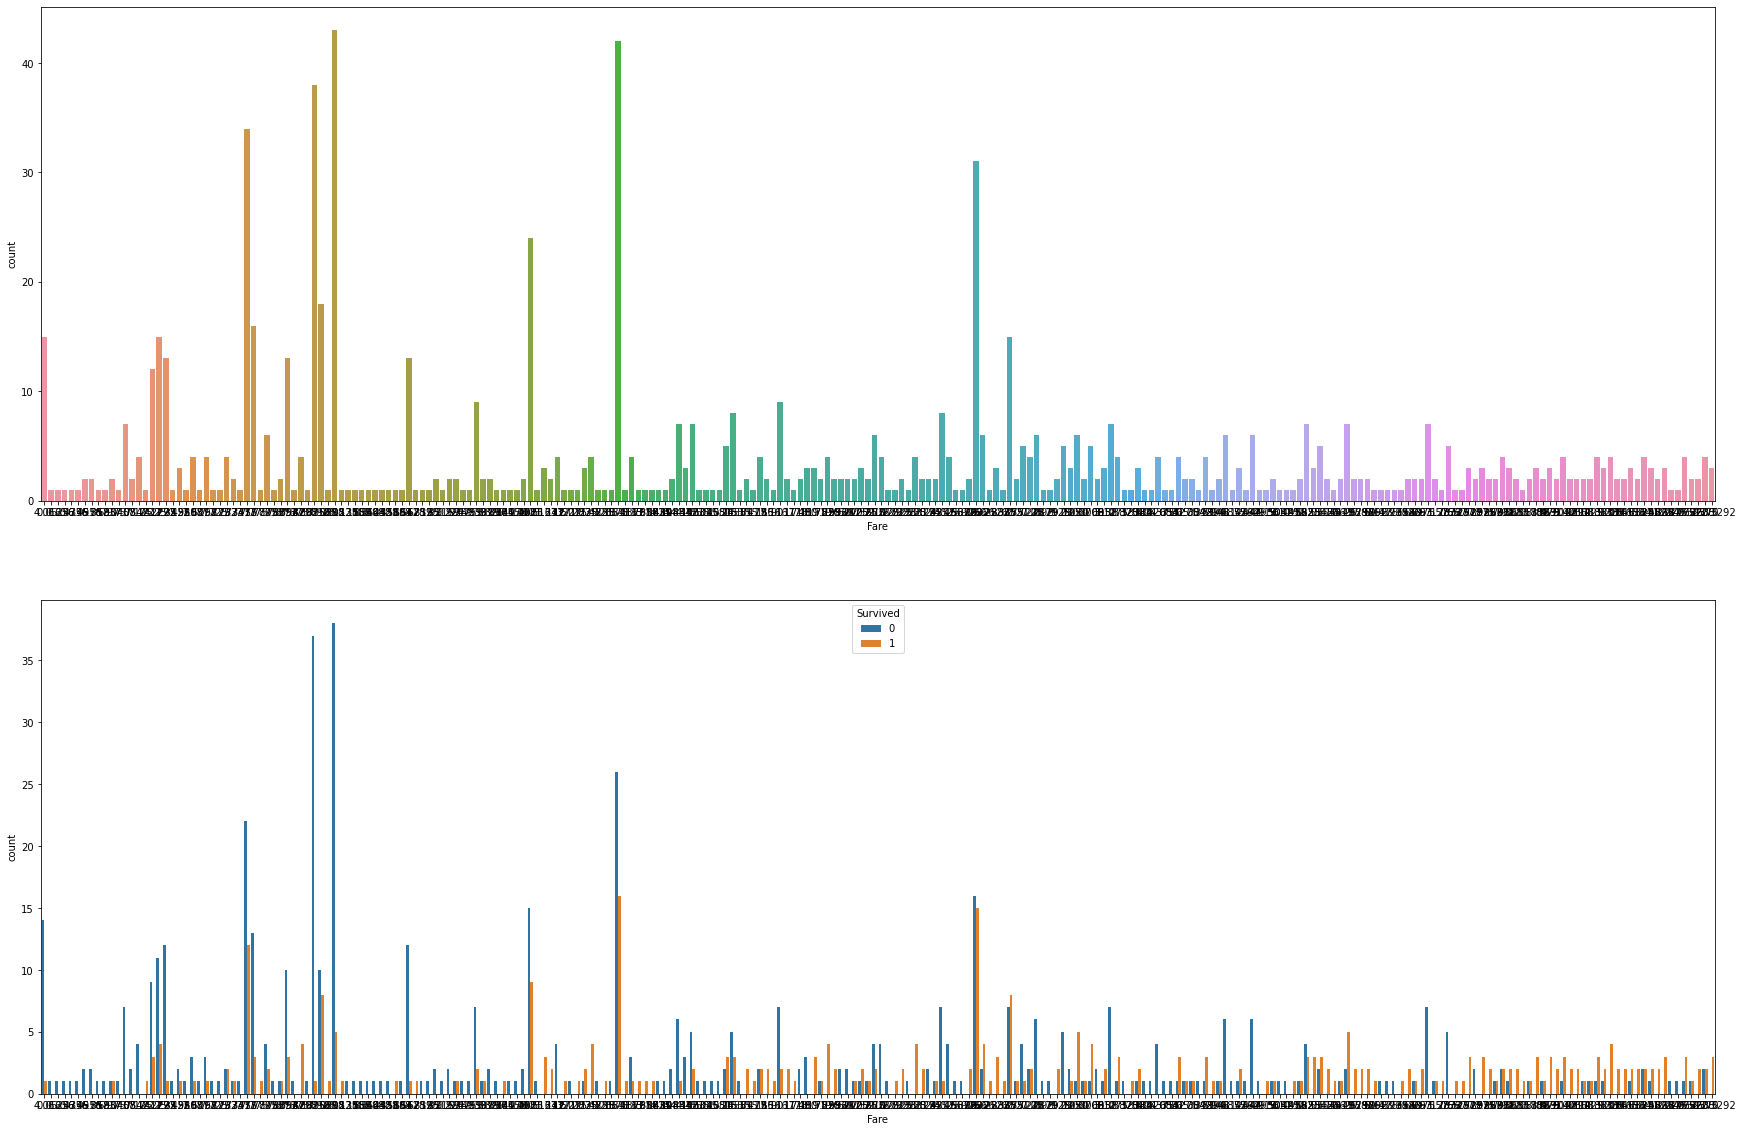

In [9]:
plt.figure(figsize = [30,20])
plt.subplot(211)
sns.countplot(x = 'Fare', data = train_data)
plt.subplot(212)
sns.countplot(x = 'Fare', hue = 'Survived', data = train_data)

<AxesSubplot:>

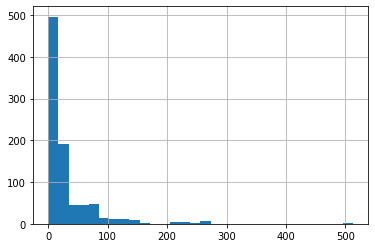

In [10]:
train_data['Fare'].hist(bins=30)

Checking co-relation between Fare and Passenger Class

In [11]:
correlation = train_data['Fare'].corr(train_data['Pclass'])
correlation

-0.5494996199439082

<AxesSubplot:xlabel='Sex', ylabel='count'>

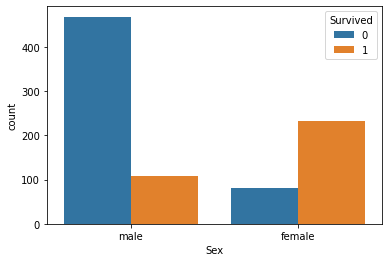

In [12]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train_data)

<AxesSubplot:xlabel='Age', ylabel='count'>

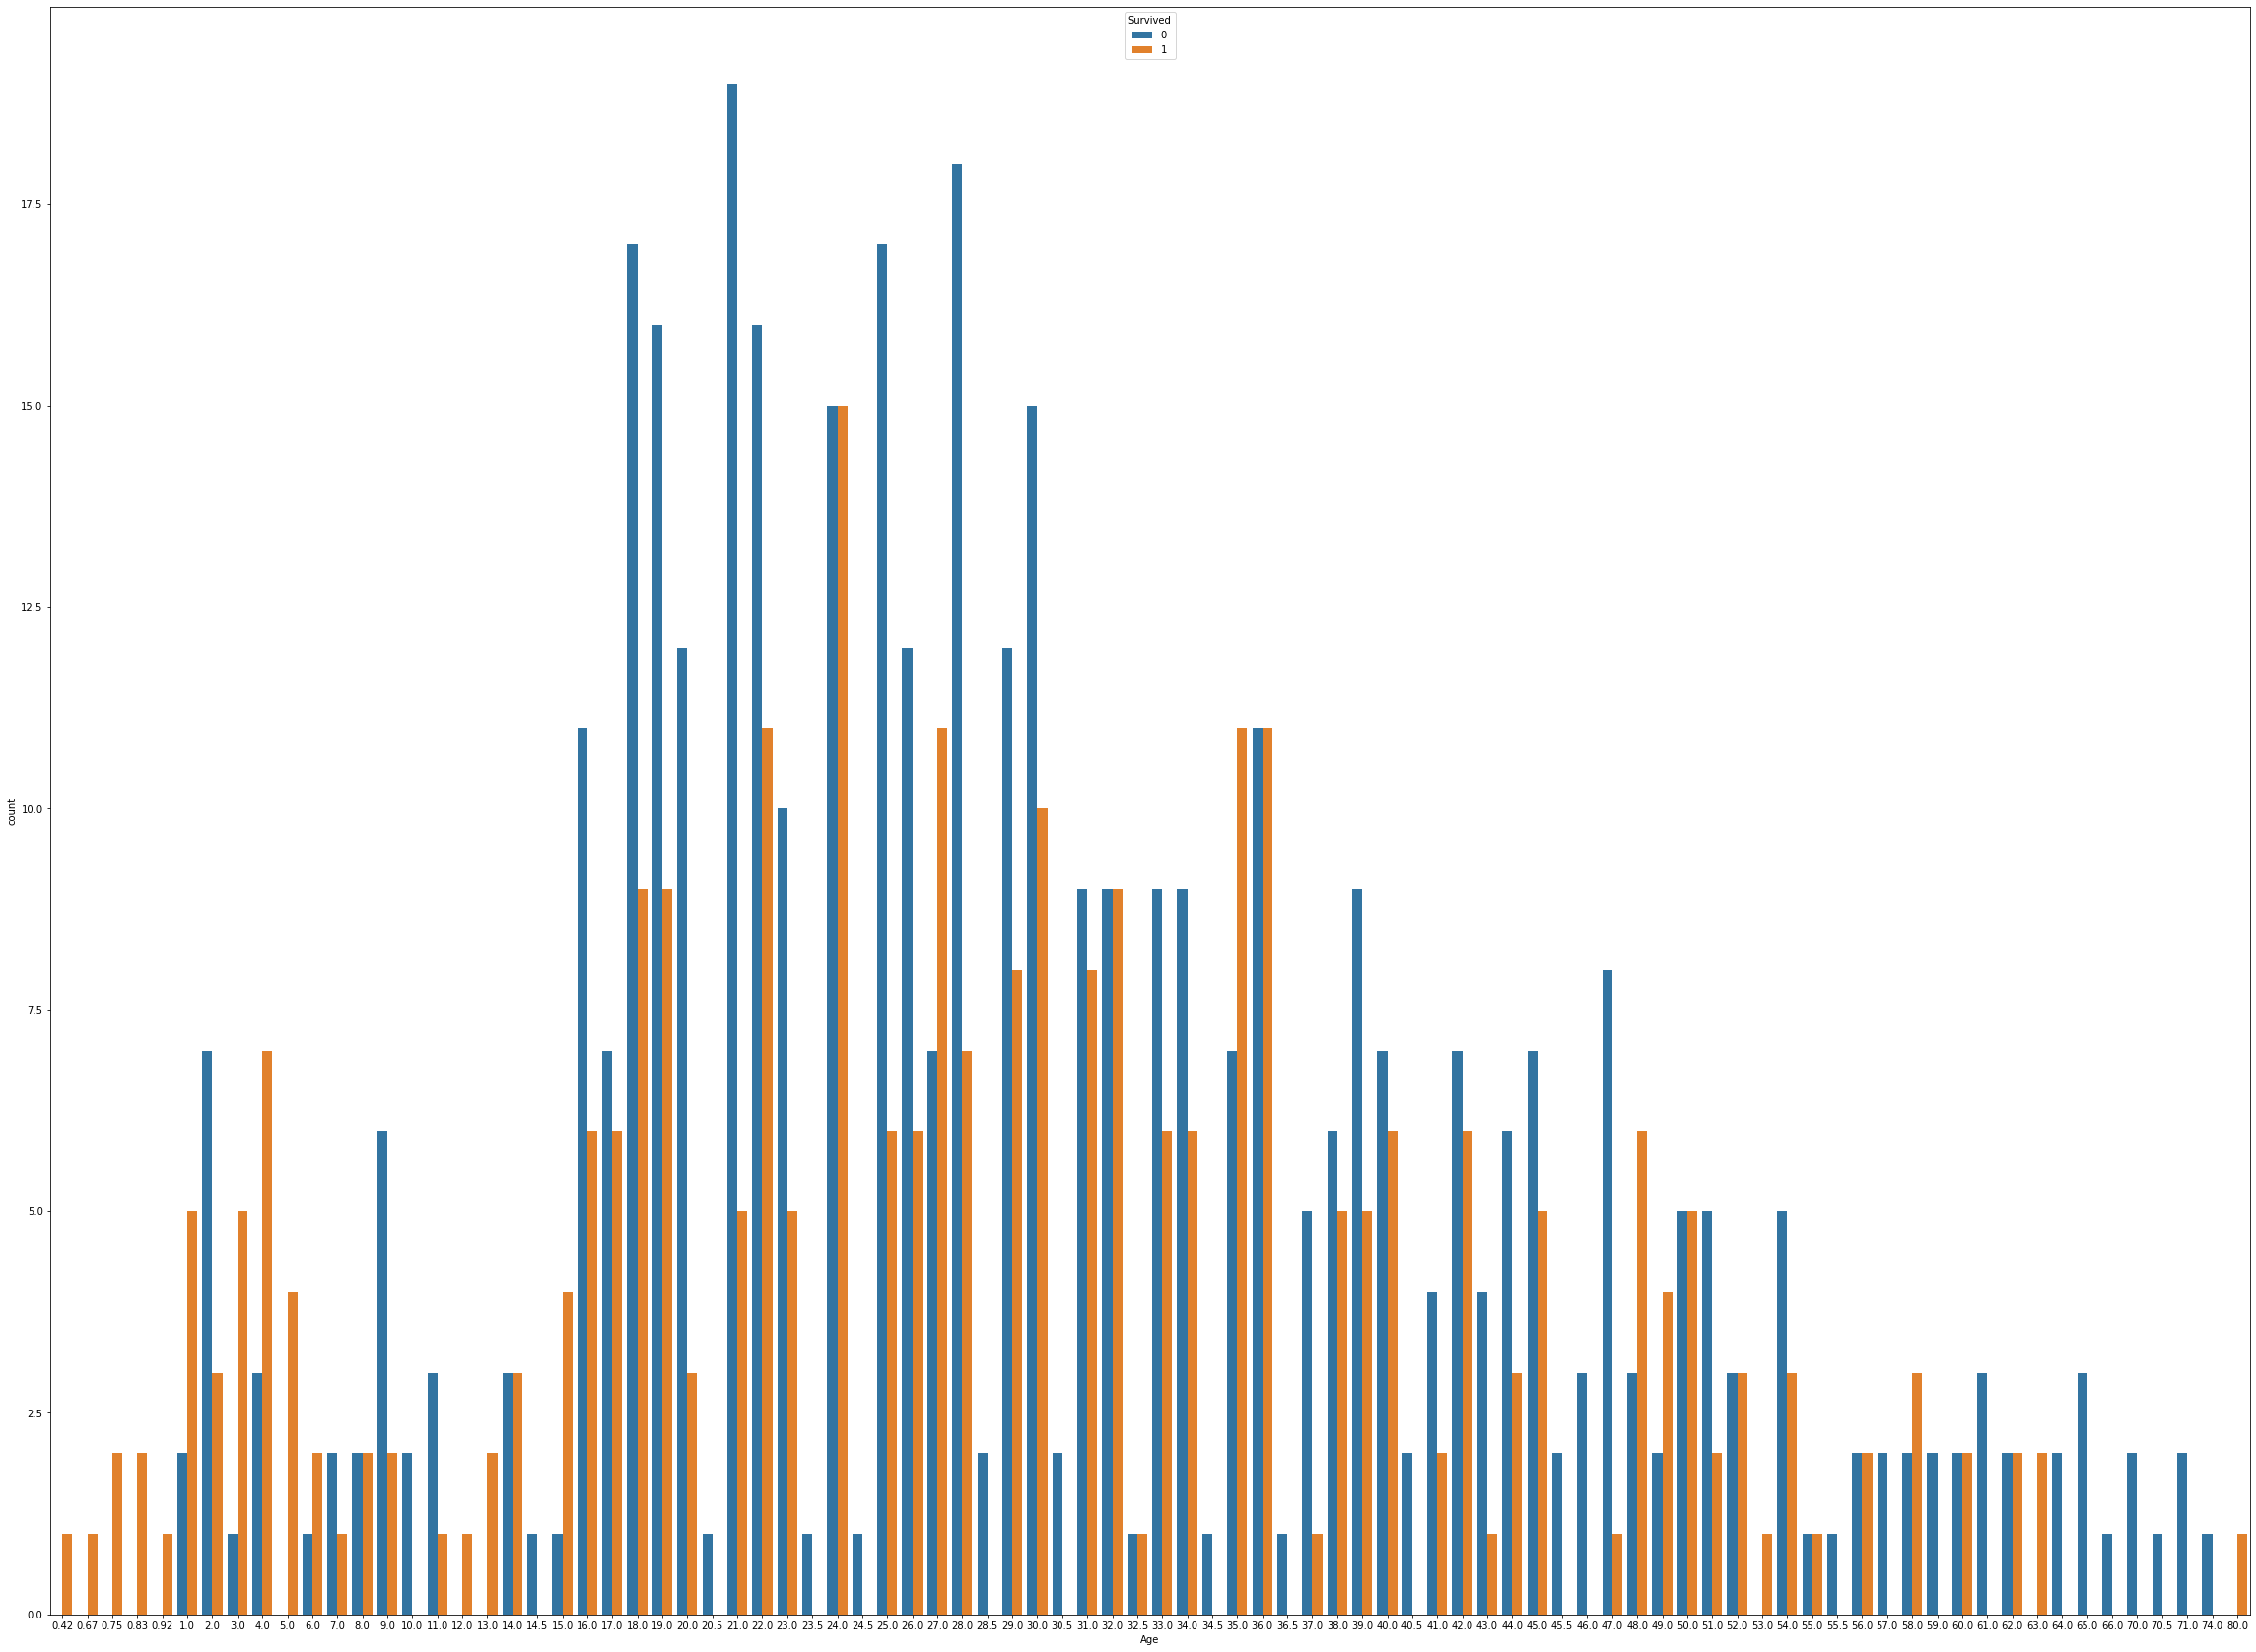

In [13]:
plt.figure(figsize = [40,30])
sns.countplot(x = 'Age', hue = 'Survived', data = train_data)

<AxesSubplot:>

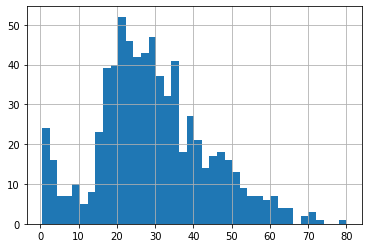

In [14]:
train_data['Age'].hist(bins = 40)

Visualizing the missing value(NaN, Blank) density in the data

<AxesSubplot:>

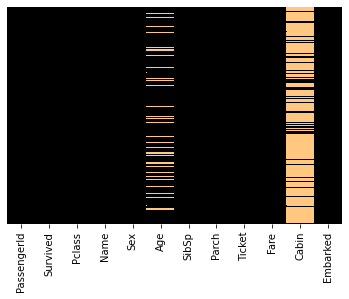

In [15]:
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap = 'copper')

# Data Cleaning

Dropping columns which doesn't contribute to predictions

In [16]:
train_data.drop(['Name','Cabin','Embarked','Ticket', 'PassengerId', 'Fare'], axis=1, inplace=True)

In [17]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


Plotting the average value of age with respect to sex

<AxesSubplot:xlabel='Sex', ylabel='Age'>

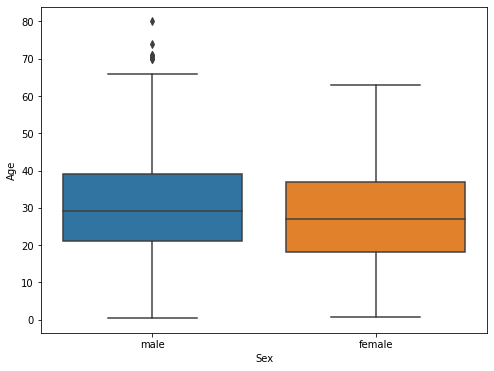

In [18]:
plt.figure(figsize =[8,6])
sns.boxplot(x='Sex', y='Age', data=train_data)

Finding average age of Male and Female category

In [19]:
female_avg_age = train_data.groupby('Sex')['Age'].mean()[0]
male_avg_age = train_data.groupby('Sex')['Age'].mean()[1]

In [20]:
female_avg_age, male_avg_age

(27.915708812260537, 30.72664459161148)

Filling empty age values

In [21]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [22]:
def fill_age(data):
    sex = data[0]
    age = data[1]
    if pd.isnull(age):
        if sex == 'male':
            return male_avg_age
        else:
            return female_avg_age
    else:
        return age

In [23]:
train_data['Age']= train_data[['Sex','Age']].apply(fill_age, axis=1)

In [24]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,27.915709,1,2
889,1,1,male,26.000000,0,0


In [25]:
train_data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Checking if missing value still present

<AxesSubplot:>

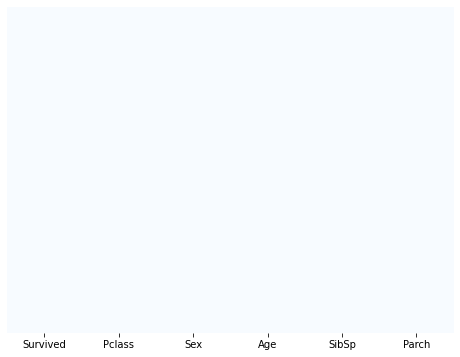

In [26]:
plt.figure(figsize = [8,6])
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot:>

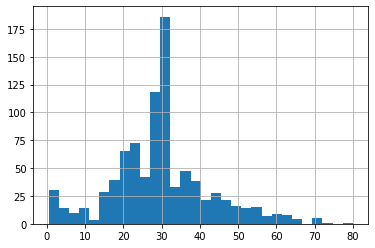

In [27]:
train_data['Age'].hist(bins=30)

converting Sex column (Categorical variable) in to numerical variable using pandas get dummies

In [28]:
male = pd.get_dummies(train_data['Sex'])

In [29]:
male

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


we just need one column to represent male or female (Dummy variable trap)

In [30]:
male = pd.get_dummies(train_data['Sex'], drop_first=True)

In [31]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Removing Sex from DataFrame and concatenating male column to it

In [32]:
train_data.drop('Sex', axis=1, inplace=True)

In [33]:
train_data

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.000000,1,0
1,1,1,38.000000,1,0
2,1,3,26.000000,0,0
3,1,1,35.000000,1,0
4,0,3,35.000000,0,0
...,...,...,...,...,...
886,0,2,27.000000,0,0
887,1,1,19.000000,0,0
888,0,3,27.915709,1,2
889,1,1,26.000000,0,0


In [34]:
train_data= pd.concat([train_data,male],axis=1)
train_data

,Survived,Pclass,Age,SibSp,Parch,male
0,0,3,22.000000,1,0,1
1,1,1,38.000000,1,0,0
2,1,3,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,0,3,35.000000,0,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,1
887,1,1,19.000000,0,0,0
888,0,3,27.915709,1,2,0
889,1,1,26.000000,0,0,1


# Model Training

Identifying predictor variable(X) and target(y) 

In [35]:
X = train_data.drop('Survived',axis=1).values
X

array([[ 3.        , 22.        ,  1.        ,  0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        ,  0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [ 3.        , 27.91570881,  1.        ,  2.        ,  0.        ],
       [ 1.        , 26.        ,  0.        ,  0.        ,  1.        ],
       [ 3.        , 32.        ,  0.        ,  0.        ,  1.        ]])

In [36]:
y = train_data['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

Splitting the dataset into training and testing

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [39]:
X_train

array([[ 3.        , 28.5       ,  0.        ,  0.        ,  1.        ],
       [ 2.        , 27.        ,  0.        ,  0.        ,  0.        ],
       [ 3.        , 27.91570881,  1.        ,  0.        ,  0.        ],
       ...,
       [ 1.        , 30.72664459,  0.        ,  0.        ,  1.        ],
       [ 3.        , 12.        ,  1.        ,  0.        ,  1.        ],
       [ 2.        , 36.        ,  0.        ,  0.        ,  1.        ]])

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

# Model Testing and Evaluation

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0,

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8100558659217877

<AxesSubplot:>

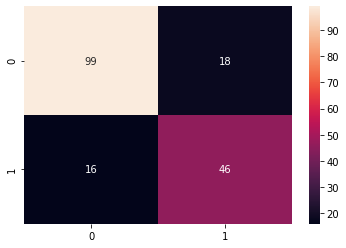

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [45]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       117
           1       0.72      0.74      0.73        62

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



# Model accuracy is 81%. (Average) 